<a href="https://colab.research.google.com/github/JamesGrooms/drowsy_detection/blob/main/CNN_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l1_l2

scratch_model = Sequential()

#### Input Layer ####
scratch_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(128, 128, 3)))

#### Convolutional Layers ####
scratch_model.add(Conv2D(32, (3,3), activation='relu'))
scratch_model.add(MaxPooling2D((2,2)))  # Pooling
scratch_model.add(Dropout(0.2)) # Dropout

scratch_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
scratch_model.add(Conv2D(64, (3,3), activation='relu'))
scratch_model.add(MaxPooling2D((2,2)))
scratch_model.add(Dropout(0.2))

scratch_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
scratch_model.add(Conv2D(128, (3,3), activation='relu'))
scratch_model.add(Activation('relu'))
scratch_model.add(MaxPooling2D((2,2)))
scratch_model.add(Dropout(0.2))

scratch_model.add(Conv2D(512, (5,5), padding='same', activation='relu'))
scratch_model.add(Conv2D(512, (5,5), activation='relu'))
scratch_model.add(MaxPooling2D((4,4)))
scratch_model.add(Dropout(0.2))

#### Fully-Connected Layer ####
scratch_model.add(Flatten())
scratch_model.add(Dense(1024, activation='relu'))
scratch_model.add(Dropout(0.2))
scratch_model.add(Dense(4, activation='softmax'))

scratch_model.summary() # a handy way to inspect the architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                        

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc


from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# assigning train and test directories
train_dir = "/content/drive/My Drive/Colab/train"
test_dir = "/content/drive/My Drive/Colab/test"

In [ ]:
import cv2
import numpy as np
import pandas as pd
import shutil
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense,Flatten,Dropout,AvgPool2D
#from keras.layers.normalization import BatchNormalization
from keras.constraints import unit_norm

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size=128  #for the inception model
image_path= train_dir

# Image augmentations
train_datagen=ImageDataGenerator(
                        rescale=1./255, # normalize pixel values between 0-1
                        validation_split=0.1,
                        horizontal_flip=True, # horizontal transposition
                        width_shift_range=0.2, # shift the weidth of the image 20%
                        height_shift_range=0.2, # shift the height of the image 20%
                        shear_range=0.2,
                        rotation_range=40, # random rotation at 40 degrees
                        fill_mode='nearest'
                        # brightness_range=[0.1, 0.9] # specify the range in which to decrease/increase brightness
                        )

train_generator=train_datagen.flow_from_directory(
                        image_path, 
                        target_size=(image_size,image_size),
                        subset='training',
                        shuffle=True,
                        batch_size=128,
                        class_mode='categorical'
                        )

valid_datagen=ImageDataGenerator(
                        validation_split=0.1,
                        rescale=1./255
                        )

valid_generator=valid_datagen.flow_from_directory(
                        image_path, 
                        target_size=(image_size,image_size),
                        subset='validation',
                        shuffle=False,
                        batch_size=128,
                        class_mode='categorical'
)

Found 2223 images belonging to 4 classes.
Found 244 images belonging to 4 classes.


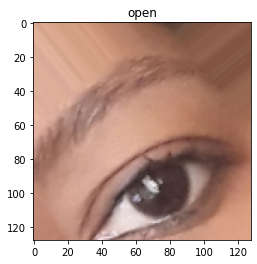

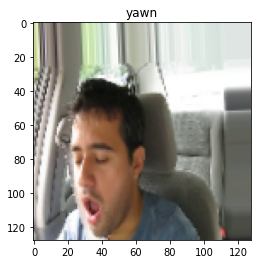

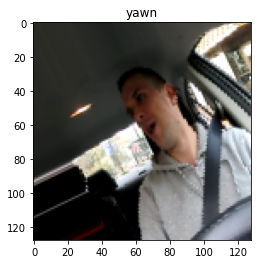

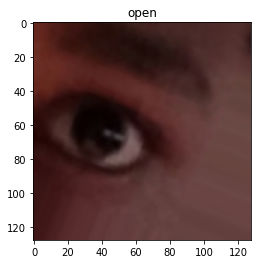

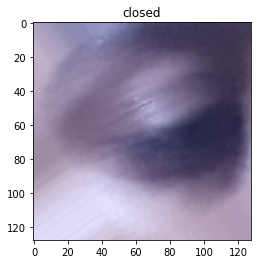

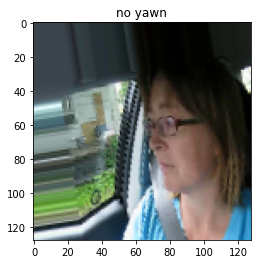

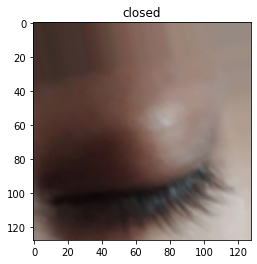

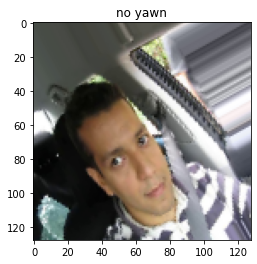

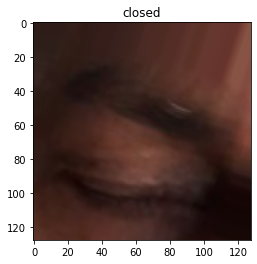

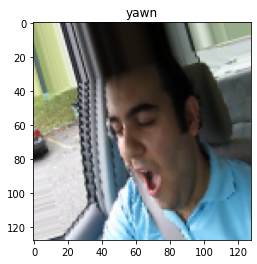

In [ ]:
x,y = train_generator.next()
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    c=0
    for i in y[i]:
        if i==0:
            c+=1
        else:break
    label=labels[c]
    label=label.replace('_',' ')
    label=label.lower()
    plt.title(label)
    plt.show()

In [ ]:
scratch_model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
!pip install livelossplot
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

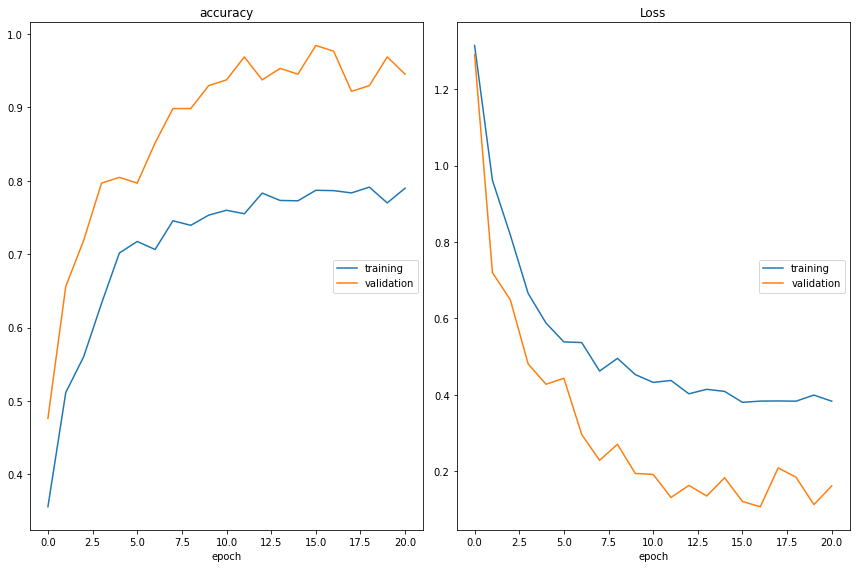

accuracy
	training         	 (min:    0.356, max:    0.791, cur:    0.790)
	validation       	 (min:    0.477, max:    0.984, cur:    0.945)
Loss
	training         	 (min:    0.381, max:    1.314, cur:    0.384)
	validation       	 (min:    0.108, max:    1.290, cur:    0.162)
17/17 [==============================] - 26s 2s/step - loss: 0.3837 - accuracy: 0.7900 - val_loss: 0.1620 - val_accuracy: 0.9453


In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5,min_delta=0,mode='auto',restore_best_weights=False,baseline=None)
checkpoint = ModelCheckpoint('Scratch_model_best_weights.h5', monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)
STEPS_PER_EPOCH = 2223 // 128  
VALID_STEPS = 244 // 128
scratch_history=scratch_model.fit_generator(train_generator,
                   steps_per_epoch=STEPS_PER_EPOCH,
                   epochs=50,
                   validation_data=valid_generator,
                   validation_steps=VALID_STEPS,
                   callbacks=[callback, checkpoint, plot_loss_1])

In [ ]:
scratch_model_json = scratch_model.to_json()
with open("scratch_model.json", "w") as json_file:
    json_file.write(scratch_model_json)